<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [13]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


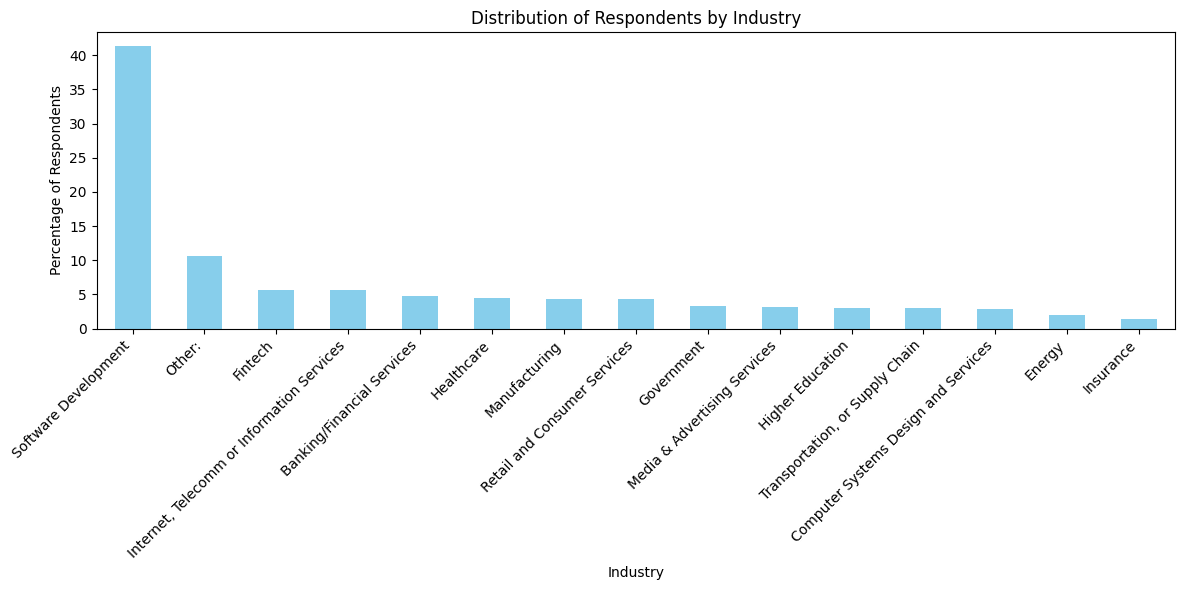

In [3]:
industry_counts = df['Industry'].value_counts()

# 3. Calculate the percentage of each industry
industry_percentages = (industry_counts / industry_counts.sum()) * 100

# 4. Sort the industries by percentage for better readability
industry_percentages = industry_percentages.sort_values(ascending=False)

# 5. Create a bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
industry_percentages.plot(kind='bar', color='skyblue')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [8]:
mean_compensation = df['ConvertedCompYearly'].mean()
std_compensation = df['ConvertedCompYearly'].std()

# 3. Define the threshold for outliers (e.g., 3 standard deviations above the mean)
threshold = mean_compensation + 3 * std_compensation

# 4. Filter the data to identify respondents with compensation above the threshold
high_compensation_respondents = df[df['ConvertedCompYearly'] > threshold]

# 5. Print the number of respondents with high compensation
print(f"\nNumber of respondents with compensation exceeding the threshold: {len(high_compensation_respondents)}")



Number of respondents with compensation exceeding the threshold: 89


In [17]:
print(df['ConvertedCompYearly'].median())

65000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.



Number of outliers using IQR method: 978

Details of outliers (IQR method):
       ConvertedCompYearly
428               230000.0
456               300000.0
461               254425.0
529               650000.0
545               400000.0
...                    ...
40952             750000.0
41000             235000.0
41001             260000.0
41027             700000.0
41187             222834.0

[978 rows x 1 columns]


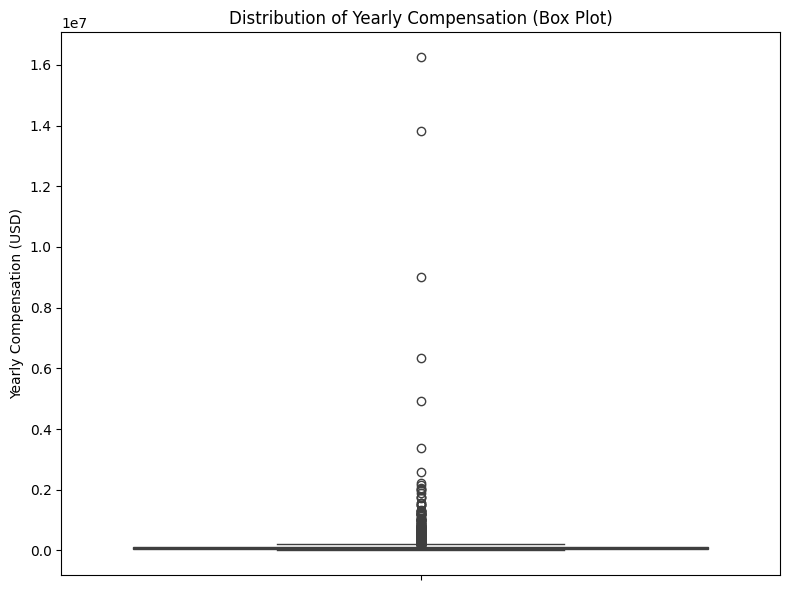

In [10]:
# 1. Calculate the first quartile (Q1) and third quartile (Q3) of 'ConvertedCompYearly'
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# 2. Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# 3. Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# 5. Count the number of outliers
num_outliers = len(outliers)
print(f"\nNumber of outliers using IQR method: {num_outliers}")

# 6. Print the details of the outliers
print("\nDetails of outliers (IQR method):")
print(outliers[['ConvertedCompYearly']])

# 7. Visualize the distribution of 'ConvertedCompYearly' with a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y='ConvertedCompYearly', data=df)
plt.title('Distribution of Yearly Compensation (Box Plot)')
plt.ylabel('Yearly Compensation (USD)')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [11]:
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)].copy() # added .copy()

# 2. Validate the size of the new DataFrame
print(f"\nOriginal DataFrame size: {len(df)}")
print(f"DataFrame size after removing outliers: {len(df_no_outliers)}")

# 3. Display the first 5 rows of the new DataFrame
print("\nFirst 5 rows of DataFrame without outliers:")
print(df_no_outliers.head())


Original DataFrame size: 65437
DataFrame size after removing outliers: 22457

First 5 rows of DataFrame without outliers:
     ResponseId                                         MainBranch  \
72           73                     I am a developer by profession   
374         375  I am not primarily a developer, but I write co...   
379         380                     I am a developer by profession   
385         386                     I am a developer by profession   
389         390                     I am a developer by profession   

                 Age                                         Employment  \
72   18-24 years old  Employed, full-time;Student, full-time;Indepen...   
374  25-34 years old                                Employed, full-time   
379  35-44 years old                                Employed, full-time   
385  35-44 years old  Independent contractor, freelancer, or self-em...   
389  25-34 years old             Employed, full-time;Student, part-time   

     

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.



Correlation with Age:
JobSatPoints_10       -0.111980
JobSatPoints_11       -0.106743
JobSatPoints_5        -0.096800
JobSatPoints_7        -0.084053
JobSatPoints_9        -0.084002
JobSatPoints_4        -0.070060
JobSatPoints_8        -0.051550
JobSatPoints_6        -0.051272
ResponseId            -0.040862
JobSatPoints_1        -0.038828
CompTotal             -0.021397
JobSat                 0.067088
ConvertedCompYearly    0.371643
WorkExp                0.842952
Age_Numeric            1.000000
Name: Age_Numeric, dtype: float64


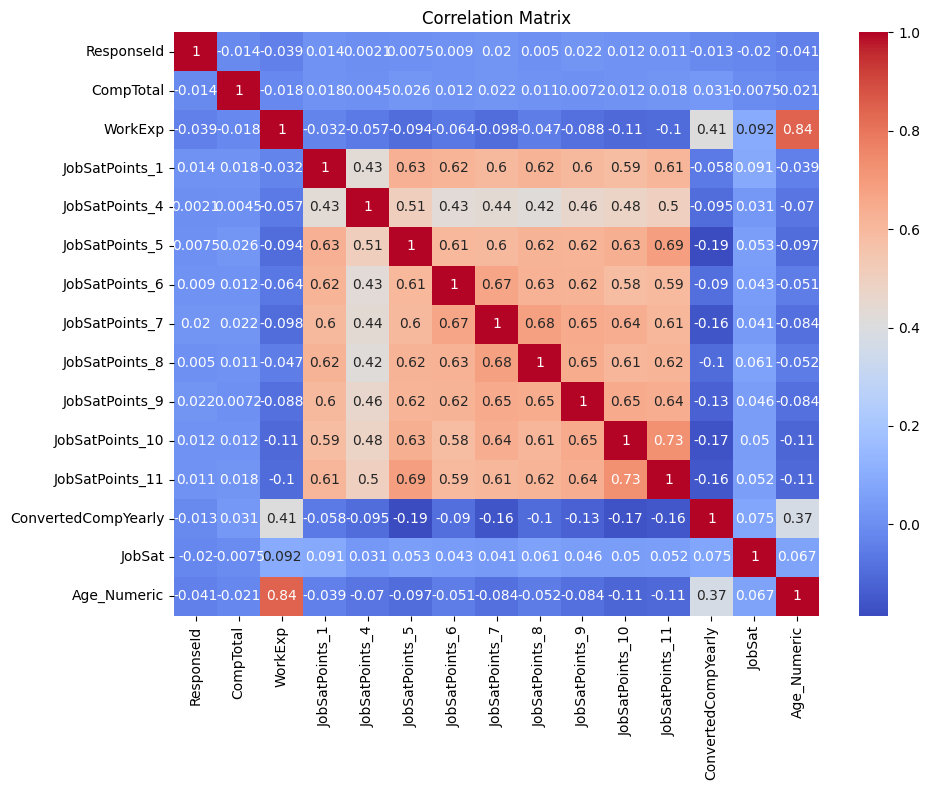

In [14]:
age_mapping = {
    'Under 18 years old': 16,  # Approximate average for this group
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df_no_outliers['Age_Numeric'] = df_no_outliers['Age'].map(age_mapping)

# 3. Compute correlations between 'Age_Numeric' and other numeric variables
numeric_df = df_no_outliers.select_dtypes(include=np.number)
age_correlation = numeric_df.corr()['Age_Numeric'].sort_values()

# 4. Print the correlation values
print("\nCorrelation with Age:")
print(age_correlation)

# 5. Visualize the correlation matrix (optional, if you have other numeric columns)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
